In [ ]:
!pip install -upgrade pip

In [ ]:
!pip install backtesting

In [ ]:
!pip install yfinance

In [4]:
import pandas as pd
import yfinance as yf

# ソフトバンクの株価データを取得
sticker = '9984.T'
start = '2018-01-01'
end = '2021-12-31'

data = yf.download(sticker, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,4460.0,4460.0,4460.0,4460.0,4273.550293,0
2018-01-02,4460.0,4460.0,4460.0,4460.0,4273.550293,0
2018-01-03,4460.0,4460.0,4460.0,4460.0,4273.550293,0
2018-01-04,4610.0,4657.5,4586.0,4651.0,4456.565430,17888400
2018-01-05,4670.5,4674.0,4589.0,4620.5,4427.340332,11306200


**Backtest** クラスは、バックテストの実行や結果の取得を行うためのクラスです。Backtestクラスのインスタンスを作成し、バックテストに使用するデータや取引戦略を指定して実行することができます。

**Strategy** クラスは、バックテストにおける取引戦略を定義するための基本クラスです。このクラスを継承して独自の取引戦略を実装します。Strategyクラス内では、取引戦略に必要な要素やルールを定義し、init()メソッドやnext()メソッドをオーバーライドすることで、バックテストの各ステップでの動作を指定します。

next()では売買条件を指定することが出来ます。

if文で条件を指定して、buyで買い、sellで売りを注文することが出来ます。引数を渡すことで損切り注文、指値もできます。

*   self.buy(): 買い
*   self.sell(): 売り
*   self.position.close(): 手仕舞い

crossover:

2つのデータ系列（例えば2つの移動平均線）が交差した点を検出するための関数です。これはテクニカル分析でよく使われる手法で、一方の線が他方を上回った（または下回った）時にシグナル（売りまたは買い）を生成します。

SMA:
関数は、指定した期間におけるデータの平均値を計算し、それを系列として返す関数です。これは価格の一般的なトレンドを把握するために用いられます。

In [11]:
# 2. バックテストの設定
# 3. SMAの設定
# 4. 取引ロジックの実装

from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA

class SmaCross(Strategy):
  def init(self):
    price = self.data.Close
    self.ma1 = self.I(SMA, price, 10)
    self.ma2 = self.I(SMA, price, 20)

  def next(self):
    if crossover(self.ma1, self.ma2):
      self.buy()
    elif crossover(self.ma2, self.ma1):
      self.sell()

In [14]:
# 5. バックテストの実行と結果の解釈
bt = Backtest(data, SmaCross)
bt.run()

<ipython-input-14-f9410b063d2c>:2: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(data, SmaCross)


Start                     2018-01-01 00:00:00
End                       2021-12-30 00:00:00
Duration                   1459 days 00:00:00
Exposure Time [%]                   75.530839
Equity Final [$]                          0.0
Equity Peak [$]                       13654.0
Return [%]                             -100.0
Buy & Hold Return [%]               21.838565
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]              160.519546
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                      -100.0
Avg. Drawdown [%]                  -23.275408
Max. Drawdown Duration      651 days 00:00:00
Avg. Drawdown Duration      178 days 00:00:00
# Trades                                    1
Win Rate [%]                              0.0
Best Trade [%]                    -117.279575
Worst Trade [%]                   -117.279575
Avg. Trade [%]                    

In [15]:
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1325', ...)


|項目|値|
|---|---|
|Start|2018年1月1日|
|End|2021年12月31日|
|Duration|1459日間|
|Exposure Time [%]|75.53%|
|Equity Final|0.0ドル|
|Equity Peak [$]|13654.0ドル|
|Return [%]|-100.0%|
|Buy & Hold Return [%]|21.84%|
|Trades|1回|
|Win Rate [%]|0%|
|Best Trade [%]|-117.28%|
|Worst Trade [%]|-177.28%|
|SQN|NaN|

用語の説明：


*   Start:バックテストが開始された日付です。
*   End:バックテストが終了した日付です。
*   Duration:バックテストが行われた期間です。
*   Exposure [%]:ポートフォリオが市場に露出していた割合です。100%は、テスト期間全体でポートフォリオがフルに投資されていたことを意味します。
*   Equity Final:バックテスト期間の終わりにおけるポートフォリオの最終的な価値です。
*   Equity Peak [$]:バックテスト期間中のポートフォリオの最高価値です。
*   Return [%]:バックテスト期間中の投資リターン（パーセンテージ）です。
*   Buy & Hold Return [%]:バックテスト期間中に資産を購入し、その期間全体で保持した場合のリターン（パーセンテージ）です。
*   Max.Drawdown [%]:バックテスト期間中の最大ドローダウン（パーセンテージ）です。ドローダウンは、ポートフォリオのピークからの最大の下落を表します。
*   Avg.Drawdown [%]:バックテスト期間中の平均ドローダウン（パーセンテージ）です。
*   Max.Drawdown Duration:最大ドローダウンが続いた最長期間です。
*   Trades:バックテスト期間中に行われた取引の数です。
*   Win Rate [%]:勝利した取引の割合（パーセンテージ）です。
*   SQN:評価方法の一つ。1.6以上であれば、取引戦略は十分な品質を持っていると考えられます。


主な見るべき指標


1.   StartとEnd：このバックテストは2018年1月1日から2021年12月31日までの期間でおこなわれました。
2.   Duration：バックテストは合計で1459日間行われました。
3.   Exposure [%]：75.53%の時間、ポジションが開かれていました。
4.   Equity FinalとEquity Peak：最終的な資産価値が0.0ドルであり、一時的には資産価値が13654.0ドルまで上昇していました。
5.   Return [%]：投資収益率は-100.0%であり、資本の全額を失っています。
6.   Buy & Hold Return [%]：同じ期間に単純に株式を購入し保有していた場合のリターンは、21.84%でした。
7.   Trades：合計で1回の取引が行われました。
8.   Win Rate [%]：成功した取引の割合（勝率）は0%でした。
9.   Best Trade [%]とWorst Trade [%]：最高の取引結果と最悪の取引結果は共に-117.28%でした。


結果：


この結果を見る限り、この戦略は期間中に全く利益を生み出すことができなかったことがわかります。最終的な資産価値が0.0ドルとなっており、1回の取引が全資本を失う結果となりました。また、成功した取引がないことから勝率も0%となっています。

In [16]:
# Backtestの引数設定

# 現金100000ドルで取引を開始して、手数料を0.05%に設定
cash = 100000
commission = 0.005

# 5. バックテストの実行と結果の解釈
bt = Backtest(data, SmaCross, cash=cash, commission=commission)
result = bt.run()
print(result)

Start                     2018-01-01 00:00:00
End                       2021-12-30 00:00:00
Duration                   1459 days 00:00:00
Exposure Time [%]                    71.48635
Equity Final [$]                          0.0
Equity Peak [$]                     145621.14
Return [%]                             -100.0
Buy & Hold Return [%]               21.838565
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]              133.014509
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                      -100.0
Avg. Drawdown [%]                  -26.196078
Max. Drawdown Duration      651 days 00:00:00
Avg. Drawdown Duration      177 days 00:00:00
# Trades                                    4
Win Rate [%]                             50.0
Best Trade [%]                      11.665104
Worst Trade [%]                    -103.47931
Avg. Trade [%]                    

In [17]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA

In [18]:
# アマゾンの株価データを取得

sticker = 'AMZN'
start = '2018-01-01'
end = '2021-12-31'

data = yf.download(sticker, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [19]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

class BuyAndHold(Strategy):
  def init(self):
    pass
  def next(self):
    self.buy()

class MovingAverageCross(Strategy):
  def init(self):
    self.ma1 = self.I(SMA, self.data.Close, 10)
    self.ma2 = self.I(SMA, self.data.Close, 20)

  def next(self):
    if crossover(self.ma1, self.ma2):
      self.buy()
    elif crossover(self.ma2, self.ma1):
      self.sell()

bt1 = Backtest(data, BuyAndHold, cash=100000, commission=0.005)
bt2 = Backtest(data, MovingAverageCross, cash=100000, commission=0.005)

result1 = bt1.run()
result2 = bt1.run()

print(result1)
print("**********")
print(result2)

Start                     2018-01-02 00:00:00
End                       2021-12-30 00:00:00
Duration                   1458 days 00:00:00
Exposure Time [%]                    99.80139
Equity Final [$]                 277078.21945
Equity Peak [$]                 308057.774495
Return [%]                         177.078219
Buy & Hold Return [%]              183.672129
Return (Ann.) [%]                   29.050734
Volatility (Ann.) [%]               41.195677
Sharpe Ratio                         0.705189
Sortino Ratio                        1.368699
Calmar Ratio                         0.851984
Max. Drawdown [%]                   -34.09773
Avg. Drawdown [%]                   -5.346141
Max. Drawdown Duration      518 days 00:00:00
Avg. Drawdown Duration       42 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     180.258454
Worst Trade [%]                    180.258454
Avg. Trade [%]                    

# backtraderライブラリを用いて実装

In [ ]:
!pip install backtrader

In [22]:
import yfinance as yf
import backtrader as bt
import matplotlib.pyplot as plt
import backtrader.plot
%matplotlib inline

# ソフトバンクの株価データを取得
data = yf.download('9984.T', start='2020-01-01', end='2023-12-31')

# データフィールドを作成
data_feed = bt.feeds.PandasData(dataname=data)

# 移動平均クロスオーバー戦略
class SmaCross(bt.Strategy):
  params = (('pfast', 10), ('pslow', 30),) # 移動平均のパラメータ

  def __init__(self):
    sma1 = bt.ind.SMA(period=self.p.pfast) # 短期移動平均
    sma2 = bt.ind.SMA(period=self.p.pslow) # 長期移動平均
    self.crossover = bt.ind.CrossOver(sma1, sma2) # クロスオーバー信号

  def next(self):
    if not self.position: # ポジションがない場合
      if self.crossover > 0: # クロスオーバー信号がポジティブなら
        self.buy() # 買う
    elif self.crossover < 0: # ポジションがあり、クロスオーバー信号がネガティブなら
      self.close() # 売る

# バックテストの設定
cerebro = bt.Cerebro()
cerebro.adddata(data_feed)
cerebro.addstrategy(SmaCross)
cerebro.broker.setcash(100000.0)
cerebro.broker.setcommission(commission=0.005)

# バックテストの実行
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %2.f' % cerebro.broker.getvalue())

[*********************100%%**********************]  1 of 1 completed


Starting Portfolio Value: 100000.00
Final Portfolio Value: 100444


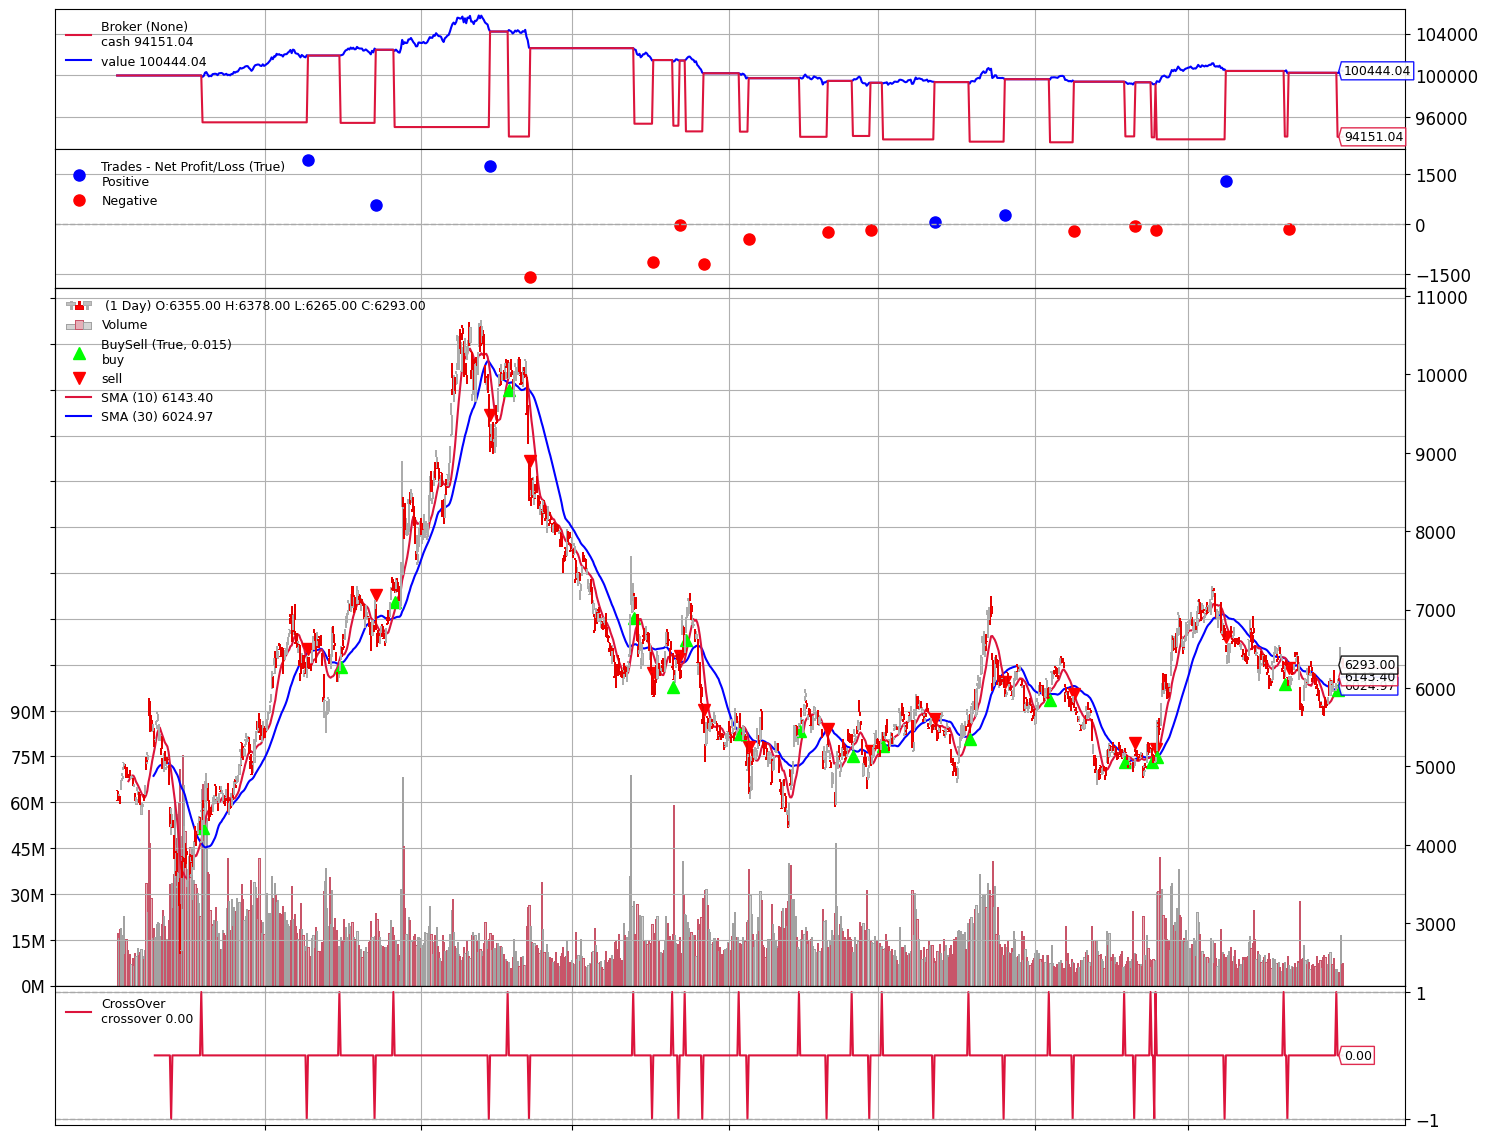

[[<Figure size 1500x1200 with 5 Axes>]]

In [23]:
# バックテストの結果をプロット
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 12})
cerebro.plot(iplot = False, style='candlestick')